In [248]:
import pandas
import numpy

In [249]:
data = pandas.read_csv("poly.csv")
df = pandas.DataFrame(data)
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [250]:
df = df.drop(columns=["sno"],axis=1)

In [251]:
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [252]:
df.isna().sum()

Temperature    0
Pressure       0
dtype: int64

In [253]:
df.dtypes

Temperature      int64
Pressure       float64
dtype: object

In [254]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [255]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear = linear.fit(x,y)

y_pred = linear.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

In [256]:
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [257]:
print(linear.coef_)
print(linear.intercept_)

[0.002342]
-0.05086666666666667


In [258]:
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y,y_pred))

44.775078189300416


In [259]:
from sklearn.metrics import r2_score

print(r2_score(y,y_pred))

0.690349972603981


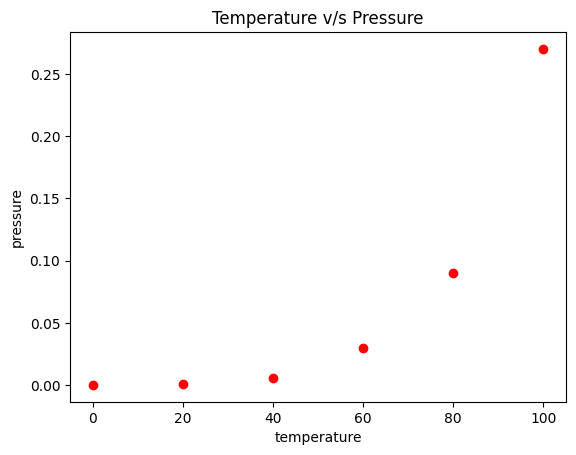

In [260]:
from matplotlib import pyplot 

pyplot.scatter(x,y,color = "red")
pyplot.xlabel("temperature")
pyplot.ylabel("pressure")
pyplot.title("Temperature v/s Pressure")
pyplot.show()

In [261]:
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

In [262]:
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [263]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3)

x_poly = pf.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [264]:
model1 = LinearRegression()
model1.fit(x_poly,y)

y_poly = model1.predict(x_poly)
y_poly

array([-0.00198889,  0.00724444,  0.00371111,  0.02248889,  0.09865556,
        0.26728889])

In [265]:
df1 = pandas.DataFrame({"actual_values" : y , "simple_linear_values" : y_pred,"polynomial_values" : y_poly})
df1

,actual_values,simple_linear_values,polynomial_values
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289


In [266]:
print(mean_absolute_percentage_error(y,y_poly))
print(r2_score(y,y_poly))

2.7865912208924066
0.9966691251761722
